In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
base_path = '/Users/ruby/EoR'
sys.path.append('{}/pyuvdata'.format(base_path))
import pyuvdata
from pyuvdata import UVData

In [2]:
uv = UVData()
uv.read_uvfits('{}/1061316296.uvfits'.format(base_path), read_data=False)
baseline_lengths = np.sqrt(np.sum(np.abs(uv.uvw_array)**2., axis=1))
baseline_lengths = np.array(list(set(baseline_lengths)))

Required Antenna frame keyword not set, but this appears to be a Cotter file, setting to ITRF.


In [15]:
baseline_lengths_all = np.zeros((len(baseline_lengths), 384))
for freq_ind in range(384):
    baseline_lengths_all[:, freq_ind] = (
        baseline_lengths*(uv.freq_array[0, freq_ind])/(3.*10**8)
    )
baseline_lengths_all = baseline_lengths_all.flatten()
baseline_lengths_all = baseline_lengths_all[
    np.where(baseline_lengths_all != 0.)
]
baseline_lengths_log = np.log10(baseline_lengths_all)
baseline_hist, bin_edges_log = np.histogram(baseline_lengths_log, bins=100)
bin_edges = 10**bin_edges_log

plot_xvals = [bin_edges[0]]
plot_yvals = [0.]
for bin_ind in range(len(bin_edges)-1):
    plot_xvals.extend([bin_edges[bin_ind], bin_edges[bin_ind+1]])
    plot_yvals.extend([baseline_hist[bin_ind], baseline_hist[bin_ind]])
plot_xvals.append(bin_edges[-1])
plot_yvals.append(0.)
plot_xvals = np.array(plot_xvals)
plot_yvals = np.array(plot_yvals)

In [6]:
def wl_to_angles(wl):
    return np.arcsin(1/wl)*180/np.pi
def angles_to_wl(angle):
    return 1/np.sin(angle*np.pi/180)

divide by zero encountered in true_divide


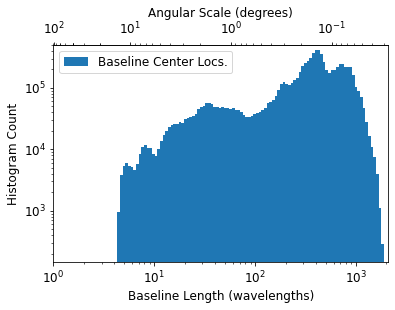

In [35]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(6, 4))
plt.fill_between(
    plot_xvals, 0, plot_yvals, alpha=1, label='Baseline Center Locs.'
)
plt.xscale('log')
plt.yscale('log')
ylims = np.array([
    0.5*np.min(plot_yvals[np.where(plot_yvals > 0)]),
    1.2*np.max(plot_yvals)
])
plt.ylim(ylims)
xlim_wavelengths = np.array([1, 1.1*np.max(plot_xvals)])
ax.set_xlim(xlim_wavelengths)
ax.set_xscale('log')
secax = ax.secondary_xaxis('top', functions=(wl_to_angles, angles_to_wl))
secax.set_xlabel('Angular Scale (degrees)')
ax.set_xlabel('Baseline Length (wavelengths)')
ax.set_ylabel('Histogram Count')
ax.legend(loc=2)
plt.show()